In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv("../Datasets/pulsar_stars.csv")

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [6]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B134864E0>]],
      dtype=object)

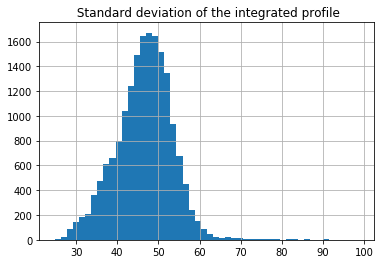

In [7]:
df.hist(column = ' Standard deviation of the integrated profile', bins = 50)

In [8]:
x = df[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']].values

x

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [9]:
y = df['target_class'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (14318, 8) (14318,)
Test set:  (3580, 8) (3580,)


# K Nearest Neighbor

In [22]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []
for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors= n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.97234637, 0.97877095, 0.98072626, 0.98072626, 0.98100559,
       0.98128492, 0.98240223, 0.98184358, 0.98128492, 0.98100559,
       0.98100559, 0.98100559, 0.98100559, 0.98072626, 0.98100559,
       0.98072626, 0.98044693, 0.98100559, 0.98128492, 0.98100559,
       0.98156425, 0.98044693, 0.98100559, 0.98044693, 0.98100559,
       0.98072626, 0.98072626, 0.98100559, 0.98072626])

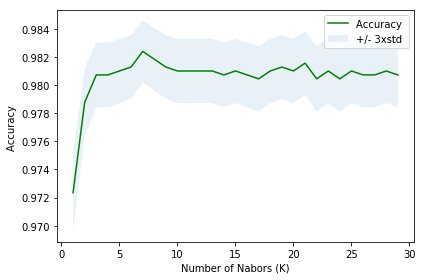

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9824022346368715 with k= 7


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
import matplotlib.image as mpimg
%matplotlib inline

In [16]:
pulsar_stars = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
pulsar_stars.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
predTree = pulsar_stars.predict(x_test)
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTree's Accuracy:  0.9748603351955307


In [18]:
dot_data = StringIO()
filename = "pulsar_stars.png"
featuresNames = df.columns[0:8]
targetNames = ['0', '1']
out = tree.export_graphviz(pulsar_stars, 
                           feature_names = featuresNames, 
                           out_file= dot_data, 
                           class_names = targetNames, 
                           filled = True, 
                           special_characters = True,
                           rotate = False)

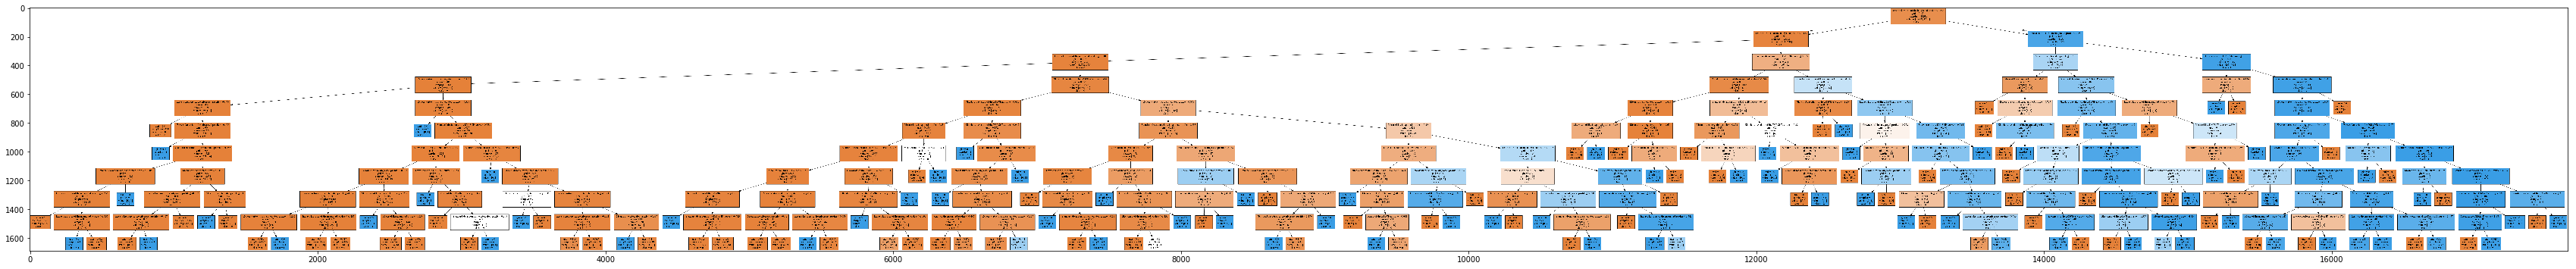

In [21]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(60, 60))
plt.imshow(img, interpolation = 'nearest')

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
import itertools

In [28]:
LR = LogisticRegression(C=0.05, solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.98855448, 0.01144552],
       [0.99522046, 0.00477954],
       [0.97484534, 0.02515466],
       ...,
       [0.99472173, 0.00527827],
       [0.97859438, 0.02140562],
       [0.98634711, 0.01365289]])

In [30]:
jaccard_similarity_score(y_test, yhat)

0.979608938547486

In [37]:
def plot_confusion_matrix(cm,
                         classes,
                         normalize = False, #normalize can be True
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print ("Normalize confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print (cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels = [1, 0]))

[[ 270   59]
 [  14 3237]]


Confusion matrix, without normalization
[[ 270   59]
 [  14 3237]]


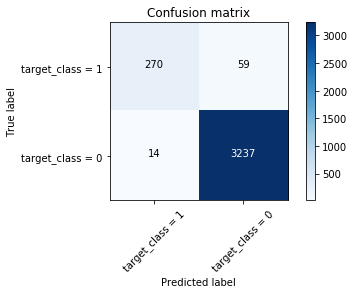

In [38]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target_class = 1', 'target_class = 0'], normalize = False, title = 'Confusion matrix')

In [39]:
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3251
          1       0.95      0.82      0.88       329

avg / total       0.98      0.98      0.98      3580



In [42]:
log_loss(y_test, yhat_prob)

0.07494786577843064

# Support Vector Machine

In [43]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
import itertools

In [44]:
clf = svm.SVC(kernel = 'rbf', gamma = 'auto')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
yhat = clf.predict(x_test)
yhat[0:5]
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3251
          1       0.95      0.85      0.90       329

avg / total       0.98      0.98      0.98      3580

Confusion matrix, without normalization
[[3237   14]
 [  48  281]]


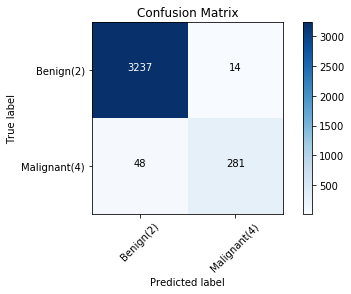

In [46]:
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision = 2)

print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize = False, title = 'Confusion Matrix')


In [47]:
f1_score(y_test, yhat, average = 'weighted')

0.9822547927781597

In [48]:
jaccard_similarity_score(y_test, yhat)

0.9826815642458101